In [1]:
##Health Insurance Prediction

# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data file (from kaggle)
data = pd.read_csv('insurance.csv')

In [ ]:
# quick overview of data
print(data.head())
print(data.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


***Exploratory Data Analysis (EDA)***

In [4]:
# basic summary statistics
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
# missing values
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Univariate Analysis**

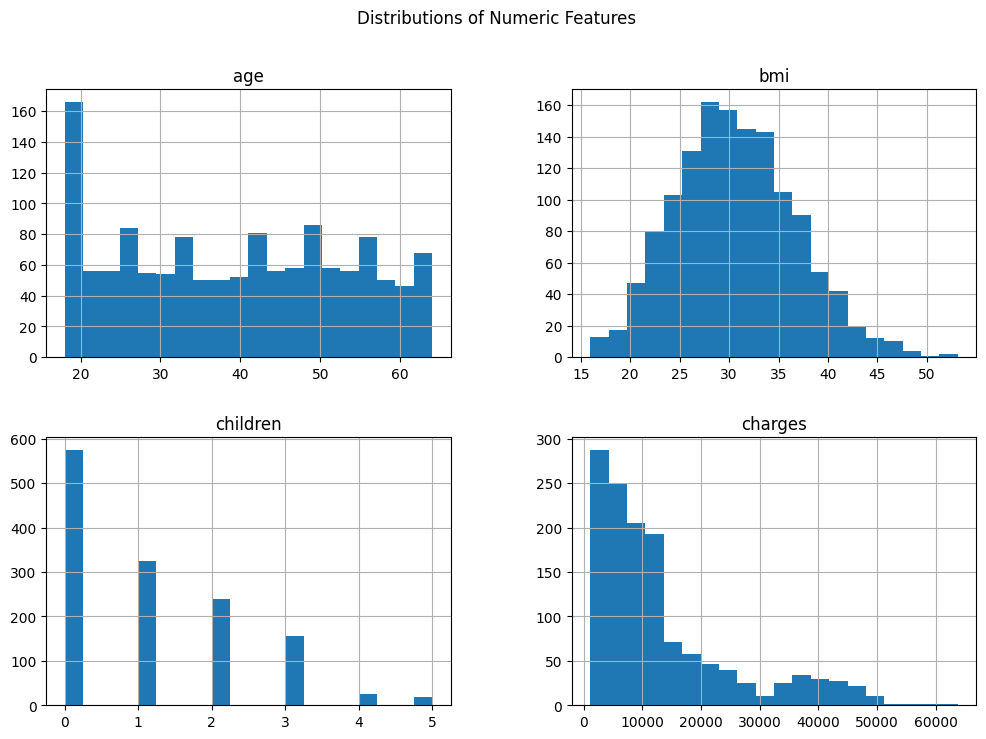

In [6]:
# histograms to analyze distribution shape of numerical cols

numeric_cols = ['age', 'bmi', 'children', 'charges']
data[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distributions of Numeric Features")
plt.show()

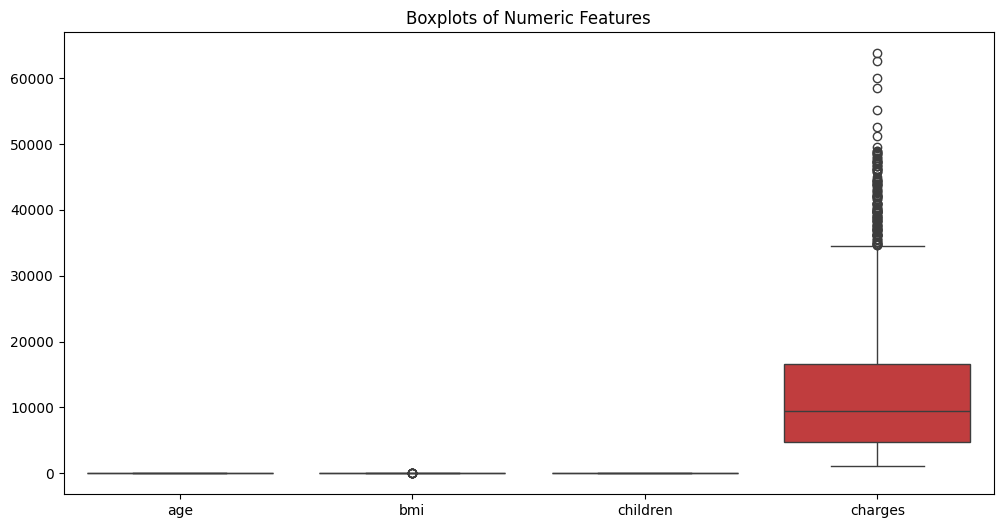

In [7]:
# boxplots for numeric features (to spot outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_cols])
plt.title("Boxplots of Numeric Features")
plt.show()

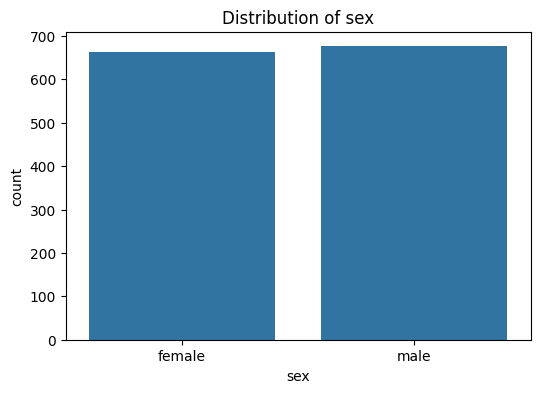

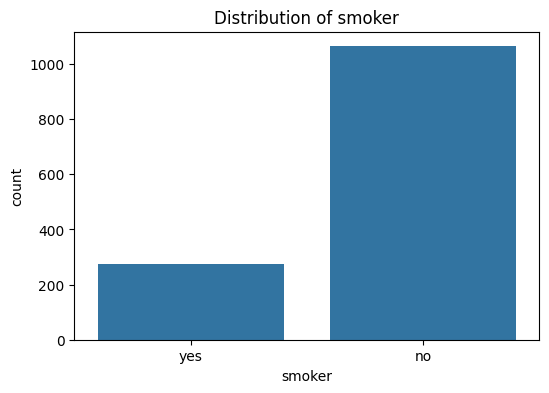

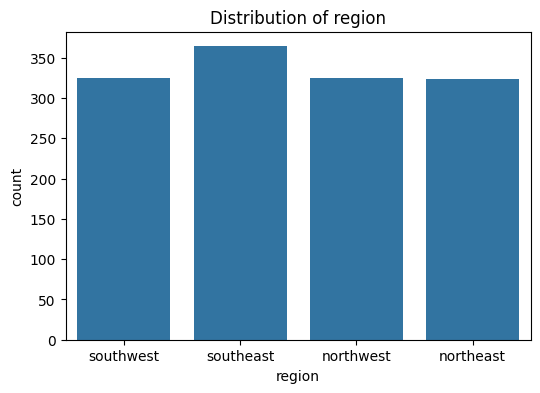

In [8]:
# countplots for categorical features
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f"Distribution of {col}")
    plt.show()

**Bivariate Analysis**

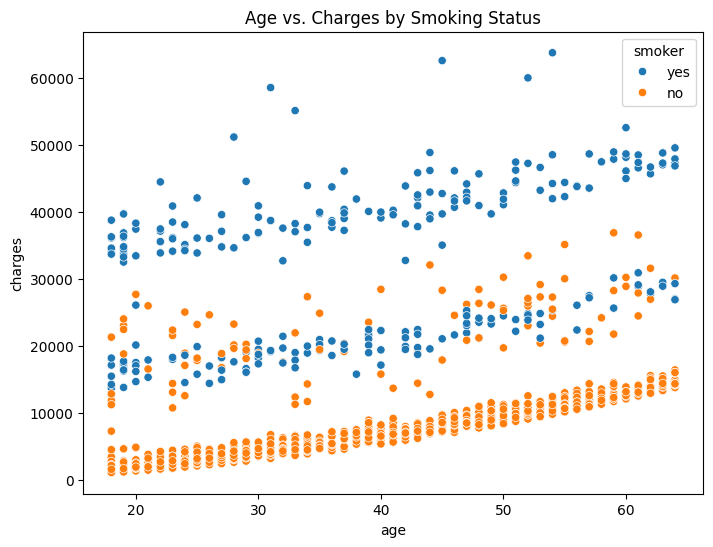

In [9]:
## age vs charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=data)
plt.title("Age vs. Charges by Smoking Status")
plt.show()

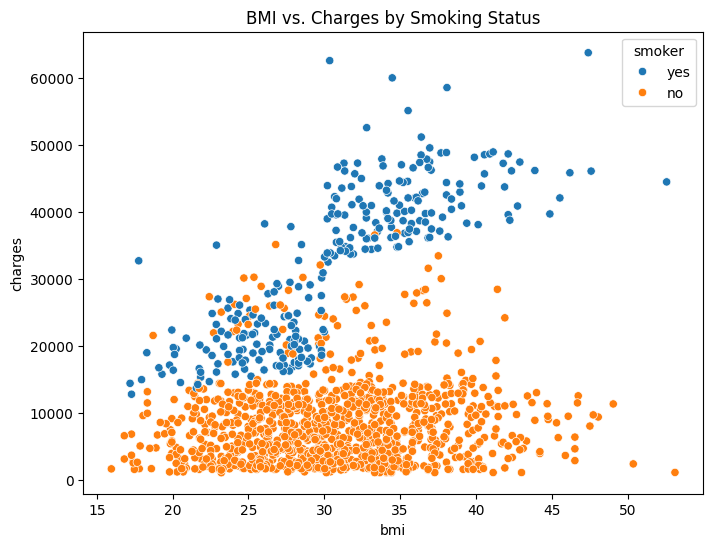

In [10]:
# BMI vs charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)
plt.title("BMI vs. Charges by Smoking Status")
plt.show()

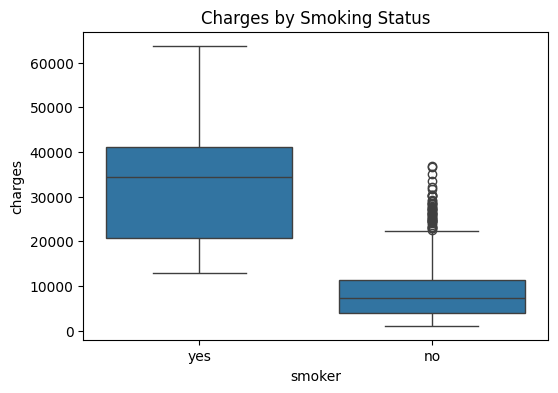

In [11]:
# smoker vs charges
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title("Charges by Smoking Status")
plt.show()

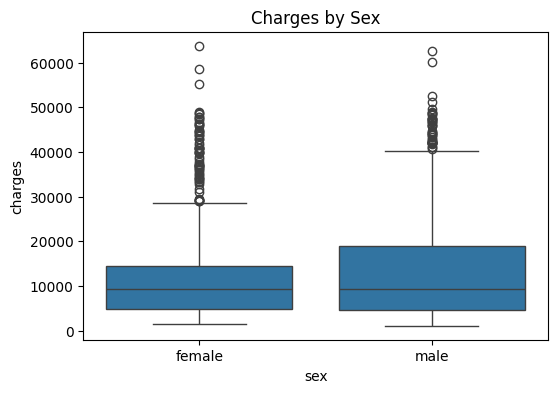

In [12]:
# sex vs charges
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex', y='charges', data=data)
plt.title("Charges by Sex")
plt.show()

/var/folders/4j/mp3j6rcn02g5c94fbrt4snn00000gn/T/ipykernel_87004/1247320966.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='charges', data=data, estimator=np.mean, ci=None)


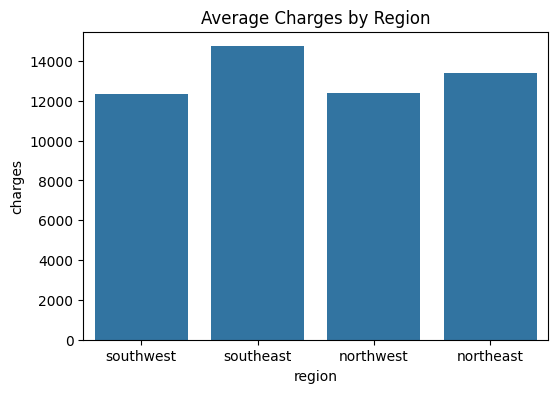

In [13]:
# region vs charges
plt.figure(figsize=(6, 4))
sns.barplot(x='region', y='charges', data=data, estimator=np.mean, ci=None)
plt.title("Average Charges by Region")
plt.show()

/var/folders/4j/mp3j6rcn02g5c94fbrt4snn00000gn/T/ipykernel_87004/4268299972.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='children', y='charges', data=data, estimator=np.mean, ci=None)


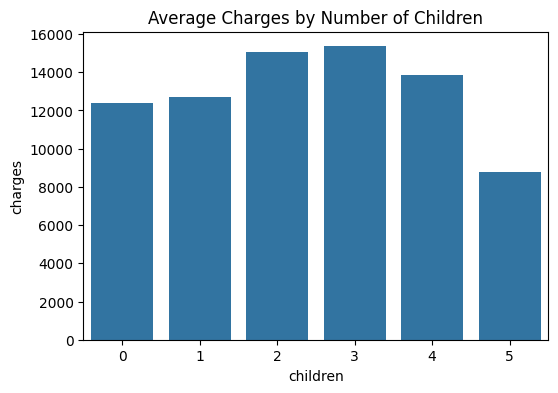

In [14]:
# children vs charges
plt.figure(figsize=(6, 4))
sns.barplot(x='children', y='charges', data=data, estimator=np.mean, ci=None)
plt.title("Average Charges by Number of Children")
plt.show()

Correlation Analysis

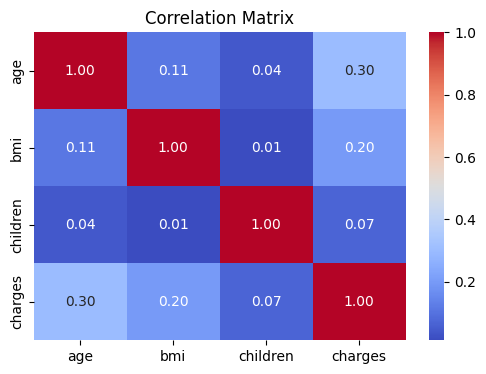

In [15]:
corr = data[numeric_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Distribution of Charges

In [16]:
# compare smokers to non-smokers
print("\nAverage charges by smoker status:\n", data.groupby('smoker')['charges'].mean())


Average charges by smoker status:
 smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [17]:
# compare obese vs non-obese (defn by BMI > 30)

data['obese'] = np.where(data['bmi'] > 30, 'Obese', 'Non-Obese')
print("\nAverage charges by Obesity Group:\n", data.groupby('obese')['charges'].mean())


Average charges by Obesity Group:
 obese
Non-Obese    10719.386942
Obese        15560.926321
Name: charges, dtype: float64


In [18]:
# by age
bins = [0, 30, 50, 100]
labels = ['<30', '30-50', '50+']
data['age_band'] = pd.cut(data['age'], bins=bins, labels=labels)
print("\nAverage charges by age band:\n", data.groupby('age_band')['charges'].mean())


Average charges by age band:
 age_band
<30       9397.552051
30-50    13280.774031
50+      18084.987223
Name: charges, dtype: float64


/var/folders/4j/mp3j6rcn02g5c94fbrt4snn00000gn/T/ipykernel_87004/169805258.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nAverage charges by age band:\n", data.groupby('age_band')['charges'].mean())


Outlier Analysis

In [19]:
top_5 = data.nlargest(5, 'charges')
print("\nTop 5 individuals by charges:\n", top_5[['age','sex','bmi','children','smoker','region','charges']])


Top 5 individuals by charges:
       age     sex     bmi  children smoker     region      charges
543    54  female  47.410         0    yes  southeast  63770.42801
1300   45    male  30.360         0    yes  southeast  62592.87309
1230   52    male  34.485         3    yes  northwest  60021.39897
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209


In [20]:
# pareto principle check: % of costs from top 5% of patients
threshold = np.percentile(data['charges'], 95)
top5_costs = data[data['charges'] >= threshold]['charges'].sum()
total_costs = data['charges'].sum()
print(f"\nTop 5% of patients account for {100*top5_costs/total_costs:.2f}% of total costs.")


Top 5% of patients account for 17.58% of total costs.


/var/folders/4j/mp3j6rcn02g5c94fbrt4snn00000gn/T/ipykernel_87004/1361229584.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


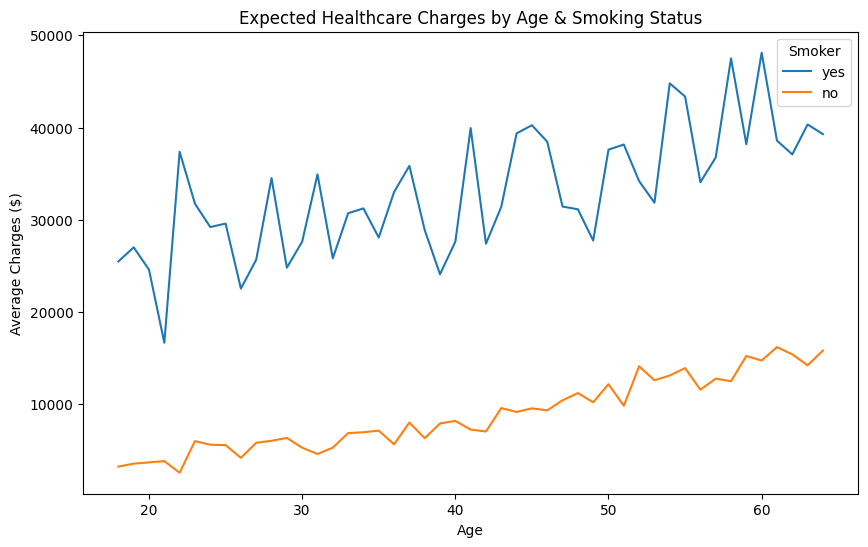

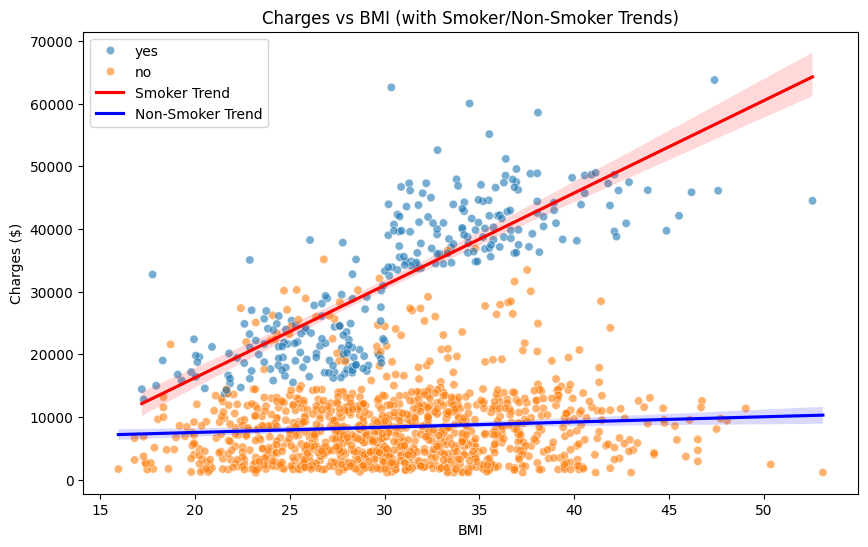

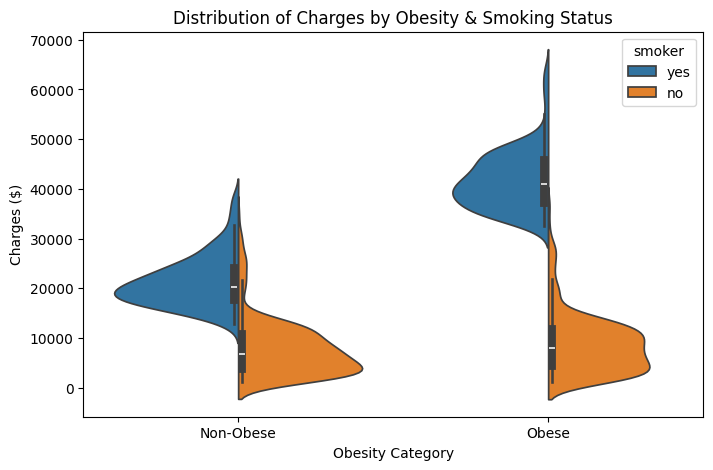

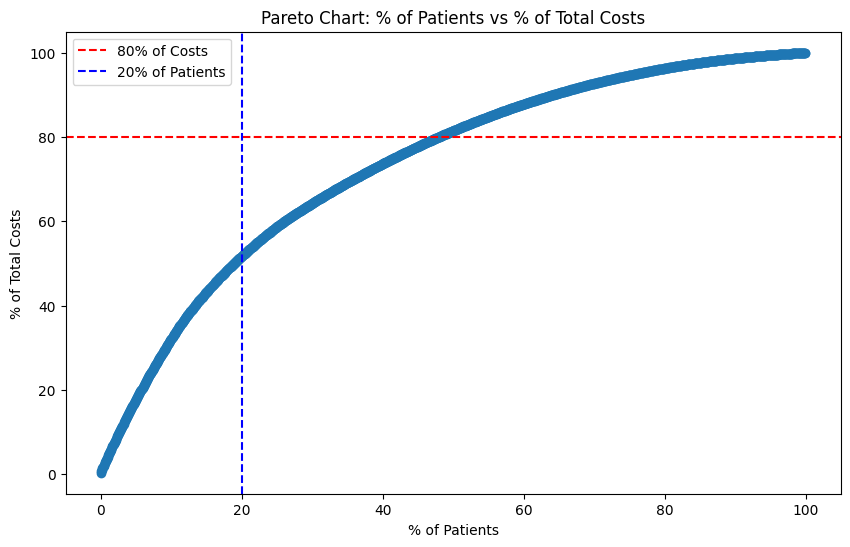

In [ ]:
#VIZ

# Average Charges by Age (Smoker vs Non-Smoker)
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=data, 
    x='age', y='charges', 
    hue='smoker', 
    estimator=np.mean, 
    ci=None
)
plt.title("Expected Healthcare Charges by Age & Smoking Status")
plt.ylabel("Average Charges ($)")
plt.xlabel("Age")
plt.legend(title="Smoker")
plt.show()


# BMI vs Charges (Smoker vs Non-Smoker)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, 
    x='bmi', y='charges', 
    hue='smoker', alpha=0.6
)
sns.regplot(
    data=data[data['smoker']=="yes"], 
    x='bmi', y='charges', 
    scatter=False, color="red", label="Smoker Trend"
)
sns.regplot(
    data=data[data['smoker']=="no"], 
    x='bmi', y='charges', 
    scatter=False, color="blue", label="Non-Smoker Trend"
)
plt.title("Charges vs BMI (with Smoker/Non-Smoker Trends)")
plt.ylabel("Charges ($)")
plt.xlabel("BMI")
plt.legend()
plt.show()

# Distribution of Charges by Risk Group
plt.figure(figsize=(8, 5))
sns.violinplot(
    data=data, 
    x='obese', y='charges', 
    hue='smoker', 
    split=True
)
plt.title("Distribution of Charges by Obesity & Smoking Status")
plt.ylabel("Charges ($)")
plt.xlabel("Obesity Category")
plt.show()

# Pareto Chart: Top % of Patients Driving Total Costs
sorted_costs = data['charges'].sort_values(ascending=False).reset_index(drop=True)
cum_costs = sorted_costs.cumsum() / sorted_costs.sum()

plt.figure(figsize=(10, 6))
plt.plot(cum_costs.index / len(cum_costs) * 100, cum_costs * 100, marker="o")
plt.axhline(80, color='red', linestyle='--', label="80% of Costs")
plt.axvline(20, color='blue', linestyle='--', label="20% of Patients")
plt.title("Pareto Chart: % of Patients vs % of Total Costs")
plt.xlabel("% of Patients")
plt.ylabel("% of Total Costs")
plt.legend()
plt.show()


**Generalized Linear Modeling (GLM)**

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
# encode categorical vars for GLM
# convert sex, smoker, region to cat
data['sex'] = data['sex'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data['region'] = data['region'].astype('category')

In [25]:
#fit the GLM (gamma w log link)

formula = "charges ~ age + bmi + children + sex + smoker + region"

glm_model = smf.glm(
    formula=formula,
    data=data,
    family=sm.families.Gamma(sm.families.links.log())
).fit()

print(glm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 1338
Model:                            GLM   Df Residuals:                     1329
Model Family:                   Gamma   Df Model:                            8
Link Function:                    log   Scale:                         0.46695
Method:                          IRLS   Log-Likelihood:                -13307.
Date:                Fri, 12 Sep 2025   Deviance:                       337.73
Time:                        13:52:59   Pearson chi2:                     621.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6833
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.3863    

/Users/nikkicassara/anaconda3/envs/new_env/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


*What this model says:*

Intercept = 7.3863
- baseline log cost when all predictors are at reference categories (female, non-smoker, northeast region, age=0, etc.)
- on the original scale, exp(7.3863) ≈ 1600, so the baseline predicted charge is about $1600.

Sex:
- not significant (p=0.128). Male vs. female doesn’t meaningfully change charges once you account for other variables.

Smoker:
- HUGE effect, coefficient ≈ 1.5 (p<0.001). That means smokers’ charges are exp(1.5) ≈ 4.5x higher than non-smokers.

Region:
- southeast and southwest are significantly lower than northeast (by ~14%). Northwest not significant.

Age:
- coefficient 0.0286, meaning each additional year increases charges by about 2.9% on average (exp(0.0286) ≈ 1.029).

BMI:
- small but significant effect, ~1.4% higher charges per unit BMI.

Children
- each child adds about 8.8% higher charges (exp(0.0842) ≈ 1.088).

Pseudo R^2 (CS) = 0.68 -> really good fit for healthcare cost modeling.

**Predicted Cost Scenarios**

In [31]:
# example profiles
example_profiles = pd.DataFrame({
    'age': [25, 45, 60, 45],
    'bmi': [22, 30, 35, 30],
    'children': [0, 2, 3, 2],
    'sex': ['female', 'female', 'male', 'male'],
    'smoker': ['no', 'no', 'yes', 'yes'],
    'region': ['northeast', 'northeast', 'southeast', 'southwest']
})

# Predict charges using your GLM
example_profiles['predicted_charges'] = glm_model.predict(example_profiles)

# Display results
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(example_profiles)

   age  bmi  children     sex smoker     region  predicted_charges
0   25   22         0  female     no  northeast            4505.28
1   45   30         2  female     no  northeast           10584.00
2   60   35         3    male    yes  southeast           69777.98
3   45   30         2    male    yes  southwest           38749.35


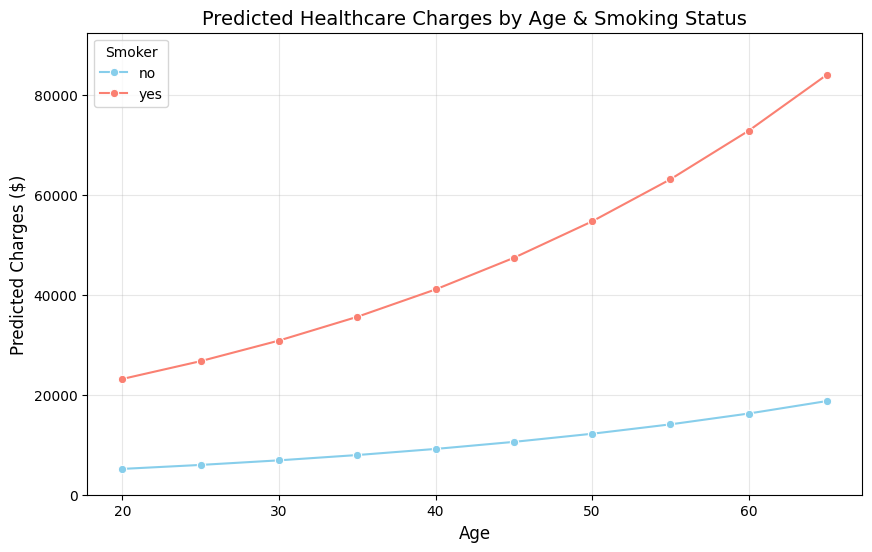

In [30]:
#VIZ

# create a range of ages for prediction
age_range = np.arange(20, 70, 5)

# build a prediction DataFrame for line plot
line_profiles = pd.DataFrame({
    'age': np.tile(age_range, 2),           # repeat ages for smoker/non-smoker
    'bmi': 30,                              # fix BMI to a representative value
    'children': 2,                          # fix children count
    'sex': 'female',                        # fix sex to female for simplicity
    'smoker': ['no']*len(age_range) + ['yes']*len(age_range),  # smoker status
    'region': 'northeast'                   # fix region
})

# predict charges
line_profiles['predicted_charges'] = glm_model.predict(line_profiles)

# plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='age', 
    y='predicted_charges', 
    hue='smoker', 
    data=line_profiles, 
    marker='o', 
    palette=['skyblue','salmon']
)

plt.title("Predicted Healthcare Charges by Age & Smoking Status", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Predicted Charges ($)", fontsize=12)
plt.legend(title="Smoker")
plt.ylim(0, line_profiles['predicted_charges'].max()*1.1)
plt.grid(True, alpha=0.3)
plt.show()